In [336]:
from __future__ import division
from pandas import DataFrame, Series
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.svm import SVC
import scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np
import statsmodels.api as sm
import pandas as pd
from sklearn import linear_model
import csv
import sys

In [337]:
Xtrain=[] # Will contain the characteristic data for each monster. Xtrain will 
		  # contain info about the monster's bone length, rotting flesh, 
		  # hair length, soul, and color. 
Ytrain=[] # WIll contain a binary label for what type of monster it is 
Xtest=[] # Will contain the characteristic data for the monsters in the test set

Xtrain = pd.read_csv("train.csv")

In [338]:
Xtrain.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [339]:
Ytrain = Xtrain['type']
Xtrain['type'].replace(['Ghoul','Goblin','Ghost'],[0,1,2],inplace=True)
Xtrain.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,0
1,1,0.575560,0.425868,0.531401,0.439899,green,1
2,2,0.467875,0.354330,0.811616,0.791225,black,0
3,4,0.776652,0.508723,0.636766,0.884464,black,0
4,5,0.566117,0.875862,0.418594,0.636438,green,2


In [340]:
Xtrain.pop('id')
Xtrain.pop('color')
Xtrain.head()

,bone_length,rotting_flesh,hair_length,has_soul,type
0,0.354512,0.350839,0.465761,0.781142,0
1,0.575560,0.425868,0.531401,0.439899,1
2,0.467875,0.354330,0.811616,0.791225,0
3,0.776652,0.508723,0.636766,0.884464,0
4,0.566117,0.875862,0.418594,0.636438,2


In [341]:
local_train, local_test = train_test_split(Xtrain,test_size=0.15,random_state=123)
local_train_y = local_train['type']
local_train_x = local_train.drop(['type'],axis=1)
local_test_y = local_test['type']
local_test_x = local_test.drop('type',axis=1)

In [342]:
clf = svm.SVC(C=1, gamma=.1)
results = clf.fit(local_train_x, local_train_y)
preds = clf.predict(local_test_x)
preds
np.mean(preds == local_test_y)

0.8214285714285714

In [343]:
target_names = list(local_train_x.columns.values)
target_names

['bone_length', 'rotting_flesh', 'hair_length', 'has_soul']

In [344]:
print(classification_report(local_test_y, preds, target_names=target_names))

               precision    recall  f1-score   support

  bone_length       0.90      0.86      0.88        22
rotting_flesh       0.70      0.78      0.74        18
  hair_length       0.87      0.81      0.84        16

  avg / total       0.83      0.82      0.82        56



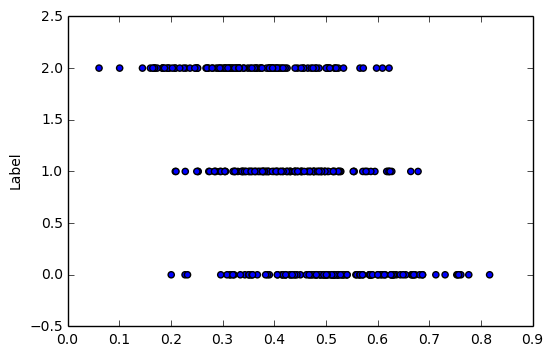

In [345]:
plt.scatter(Xtrain['bone_length'],Ytrain)
plt.ylabel('Label')
plt.show()

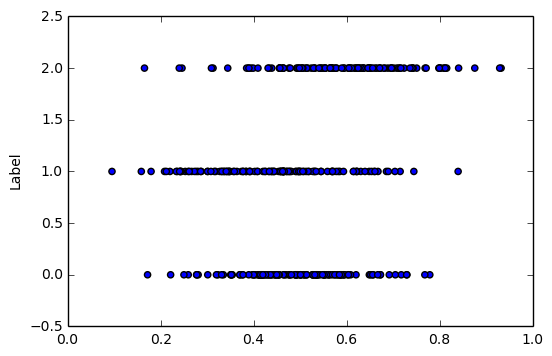

In [346]:
plt.scatter(Xtrain['rotting_flesh'],Ytrain)
plt.ylabel('Label')
plt.show()

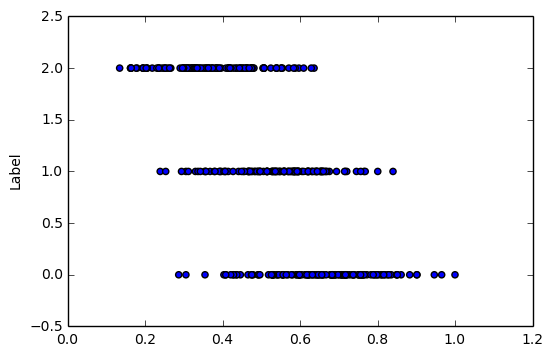

In [347]:
plt.scatter(Xtrain['hair_length'],Ytrain)
plt.ylabel('Label')
plt.show()

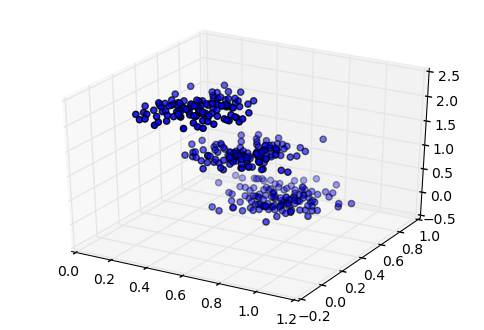

In [348]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xtrain['hair_length'],Xtrain['has_soul'],Ytrain)
plt.show()